In [1]:
import csv
from math import isnan

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constants

In [2]:
ch_results_fname = 'data_ch.csv'
bch_results_fname = 'data_bch.csv'
NUM_BOX_SIZES = 7
BOX_SIZES = [10, 15, 20, 25, 30, 35, 40]
CUBE_SIZES = [box_size**3 for box_size in BOX_SIZES]
GEOGRAPH_STATUS_TO_INDEX = {'fail_1': 0, 'fail_2': 1, 'fail_3': 2, 'fail_4': 3, 'fail_5': 4, 'success': 5}
BFS_STATUS_TO_INDEX = {'failure': 0, 'success': 1}

# Plotting parameters
MARKER_SIZE = 8
LOG_X = False
LOG_Y = False
Y_MAX = 800
point_markers = ["s", "P", "^", "x", "+", "D", ">", "*", "v", "o"]
plt.rcParams['font.size'] = '18'

## Seaborn setup

In [3]:
sns.set_context("paper", font_scale=1.5, \
                rc={"font.family": "sans-serif", "font.sans-serif": \
                    ["Helvetica", "DejaVu Sans", "Arial", "sans-serif"]})
sns.set_palette(sns.xkcd_palette(colors=["navy", "grey"]))

# CH Results

## Load data

In [4]:
ch_df = pd.read_csv(ch_results_fname)
print(len(ch_df))
ch_df["number of cells"] = ch_df["number of cells"] / 1000.
ch_df["number of cells"] = ch_df["number of cells"].round(decimals=1)
unique_cell_counts_ch = np.unique(ch_df["number of cells"])
ch_df.head(12)

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.0,geograph3d,fail_1,114.4570,3951
1,8,1.0,geograph3d,fail_2,NaN,0
2,8,1.0,geograph3d,fail_3,153.3990,213
3,8,1.0,geograph3d,fail_4,155.9430,297
4,8,1.0,geograph3d,fail_5,160.4730,419
5,8,1.0,geograph3d,success,211.3520,5120
6,8,1.0,bfs,failure,11.6529,1550
7,8,1.0,bfs,success,6.7987,8450
8,8,3.4,geograph3d,fail_1,121.1170,13081
9,8,3.4,geograph3d,fail_2,NaN,0


In [5]:
df2 = ch_df.copy()
df2["flip result"] = df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
df2["total microseconds"] = df2["average microseconds"] * df2["number of samples"]
df2.head(12)

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.0,geograph3d,fail_1,114.4570,3951,failure,452219.607
1,8,1.0,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.0,geograph3d,fail_3,153.3990,213,failure,32673.987
3,8,1.0,geograph3d,fail_4,155.9430,297,failure,46315.071
4,8,1.0,geograph3d,fail_5,160.4730,419,failure,67238.187
5,8,1.0,geograph3d,success,211.3520,5120,success,1082122.240
6,8,1.0,bfs,failure,11.6529,1550,failure,18061.995
7,8,1.0,bfs,success,6.7987,8450,success,57449.015
8,8,3.4,geograph3d,fail_1,121.1170,13081,failure,1584331.477
9,8,3.4,geograph3d,fail_2,NaN,0,failure,NaN


In [6]:
df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)", \
                    "number of zones": "Number of Zones"}, \
           inplace=True)
df3 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df3["CPU Time (microseconds)"] = df3["total microseconds"] / df3["number of samples"]
df3.drop(columns=["total microseconds"], inplace=True)
df3.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.0                         bfs        failure 2                              18.069300   
                                               8                              11.652900   
                                               25                              6.130020   
                                       success 2                               7.210390   
                                               8                               6.798700   
                                               25                              5.067720   
                            geograph3d failure 2                             122.748206   
                                               8                             122.632552   
                                               25                            111.186813   
                                       success 2                             223.971000   
                                               8                             211.352000   
                                               25                            184.068000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.0                         bfs        failure 2                              822  
                                               8                             1550  
                                               25                            2115  
                                       success 2                             9178  
                                               8                             8450  
                                               25                            7885  
                            geograph3d failure 2                             4089  
                                               8                             4880  
                                               25                            5125  
                                       success 2                             5911  
                                               8                             5120  
                                               25                            4875

In [7]:
df4 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
df4["CPU Time (microseconds)"] = df4["total microseconds"] / df4["number of samples"]
df4["Status"] = "combined"
df4.drop(columns=["total microseconds"], inplace=True)
df4 = df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df4.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   
3.4                         bfs        combined 2                              24.686315   
                                                8                              17.328614   
                                                25                             14.621460   
                            geograph3d combined 2                             194.663981   
                                                8                             177.989988   
                                                25                            156.367163   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
3.4                         bfs        combined 2                            33750  
                                                8                            33750  
                                                25                           33750  
                            geograph3d combined 2                            33750  
                                                8                            33750  
                                                25                           33750

In [8]:
df5 = pd.concat([df3, df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df5.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                                       failure  2                              18.069300   
                                                8                              11.652900   
                                                25                              6.130020   
                                       success  2                               7.210390   
                                                8                               6.798700   
                                                25                              5.067720   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                                       failure  2                              822  
                                                8                             1550  
                                                25                            2115  
                                       success  2                             9178  
                                                8                             8450  
                                                25                            7885  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000

## Plot execution time vs. number of cells

In [9]:
"""
df: DataFrame with all experimental results for one honeycomb type
number_of_zones: value to filter on "Number of Zones" column
honeycomb_type: "ch" or "bch"
"""
def plot_time_vs_cellcount(df, number_of_zones, honeycomb_type):
    dfk = df.reset_index()
    dfk = dfk[dfk["Number of Zones"] == number_of_zones]
    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure", "combined"], kind="line", markers=True, markersize=MARKER_SIZE, data=dfk);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = unique_cell_counts_ch if honeycomb_type == "ch" else unique_cell_counts_bch
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[6]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])

    plt.title("{} Results, K={}".format(honeycomb_type.upper(), number_of_zones))
    plt.savefig("plot_{}_K{}.pdf".format(honeycomb_type, number_of_zones), bbox_inches="tight")
    plt.savefig("plot_{}_K{}.png".format(honeycomb_type, number_of_zones), bbox_inches="tight", dpi=600)

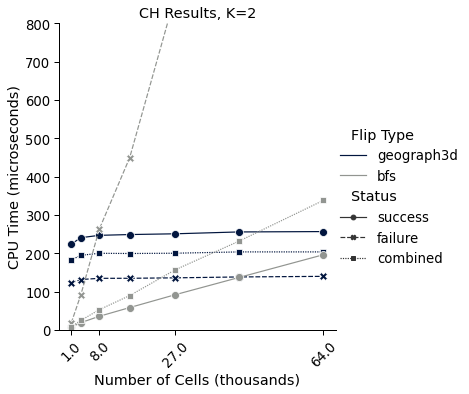

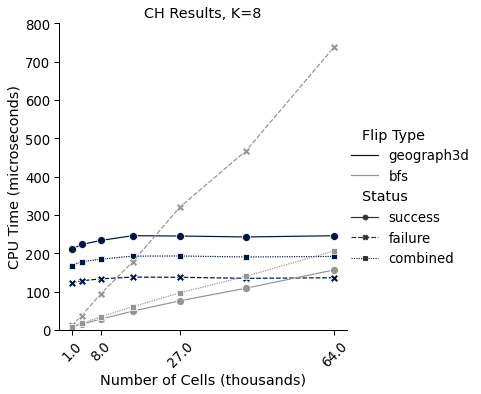

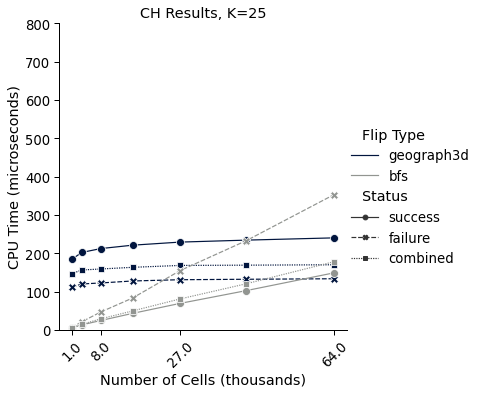

In [10]:
for k in [2, 8, 25]:
    plot_time_vs_cellcount(df5, k, "ch")

# BCH Results

## Load data

In [11]:
bch_df = pd.read_csv(bch_results_fname)
print(len(bch_df))
bch_df["number of cells"] = bch_df["number of cells"] / 1000.
bch_df["number of cells"] = bch_df["number of cells"].round(decimals=1)
unique_cell_counts_bch = np.unique(bch_df["number of cells"])
bch_df.head()

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.7,geograph3d,fail_1,209.621,9954
1,8,1.7,geograph3d,fail_2,NaN,0
2,8,1.7,geograph3d,fail_3,292.862,4213
3,8,1.7,geograph3d,fail_4,271.728,169
4,8,1.7,geograph3d,fail_5,214.312,16


In [12]:
bch_df2 = bch_df.copy()
bch_df2["flip result"] = bch_df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
bch_df2["total microseconds"] = bch_df2["average microseconds"] * bch_df2["number of samples"]
bch_df2.head()

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.7,geograph3d,fail_1,209.621,9954,failure,2086567.434
1,8,1.7,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.7,geograph3d,fail_3,292.862,4213,failure,1233827.606
3,8,1.7,geograph3d,fail_4,271.728,169,failure,45922.032
4,8,1.7,geograph3d,fail_5,214.312,16,failure,3428.992


In [13]:
bch_df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)",\
                    "number of zones": "Number of Zones"}, \
           inplace=True)
bch_df3 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df3["CPU Time (microseconds)"] = bch_df3["total microseconds"] / bch_df3["number of samples"]
bch_df3.drop(columns=["total microseconds"], inplace=True)
bch_df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.7                         bfs        failure 2                              84.282400   
                                               8                              37.385400   
                                               25                             21.469000   
                                       success 2                              15.299900   
                                               8                              12.286500   
...                                                                                 ...   
123.3                       geograph3d failure 8                             278.140039   
                                               25                            277.170305   
                                       success 2                             482.808000   
                                               8                             479.715000   
                                               25                            471.841000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.7                         bfs        failure 2                              393  
                                               8                              659  
                                               25                            1727  
                                       success 2                            16897  
                                               8                            16631  
...                                                                           ...  
123.3                       geograph3d failure 8                          1180951  
                                               25                         1176575  
                                       success 2                            48738  
                                               8                            52239  
                                               25                           56615  

[84 rows x 2 columns]

In [14]:
bch_df4 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
bch_df4["CPU Time (microseconds)"] = bch_df4["total microseconds"] / bch_df4["number of samples"]
bch_df4["Status"] = "combined"
bch_df4.drop(columns=["total microseconds"], inplace=True)
bch_df4 = bch_df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df4.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                            geograph3d combined 2                             304.843778   
                                                8                             258.474224   
                                                25                            261.168733   
6.1                         bfs        combined 2                              34.225410   
                                                8                              38.587116   
                                                25                             35.094105   
                            geograph3d combined 2                             264.405381   
                                                8                             265.332258   
                                                25                            275.240103   
14.9                        bfs        combined 2                              71.289820   
                                                8                              81.434485   
                                                25                             78.137964   
                            geograph3d combined 2                             273.231897   
                                                8                             272.828192   
                                                25                            270.387865   
29.4                        bfs        combined 2                             135.765118   
                                                8                             156.572658   
                                                25                            145.712602   
                            geograph3d combined 2                             277.006504   
                                                8                             291.247262   
                                                25                            275.802009   
51.4                        bfs        combined 2                             220.979028   
                                                8                             247.914901   
                                                25                            239.414301   
                            geograph3d combined 2                             282.182169   
                                                8                             278.945089   
                                                25                            279.455351   
82.2                        bfs        combined 2                             342.032913   
                                                8                             372.489183   
                                                25                            369.737404   
                            geograph3d combined 2                             285.291281   
                                                8                             279.947998   
                                                25                            283.244354   
123.3                       bfs        combined 2                             497.203463   
                                                8                             557.494502   
                                                25                            558.049508   
                            geograph3d combined 2                             289.710527   
                                                8                             286.678930   
                                                25                            286.107518   

                

In [15]:
bch_df5 = pd.concat([bch_df3, bch_df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df5.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                                       failure  2                              84.282400   
                                                8                              37.385400   
...                                                                                  ...   
82.2                        bfs        failure  25                           2227.100000   
                                       success  2                             331.590000   
                                                8                             353.929000   
                                                25                            356.595000   
                            geograph3d combined 2                             285.291281   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.7                         bfs        combined 2                            17290  
                                                8                            17290  
                                                25                           17290  
                                       failure  2                              393  
                                                8                              659  
...                                                                            ...  
82.2                        bfs        failure  25                            5774  
                                       success  2                           820054  
                                                8                           818963  
                                                25                          816016  
                            geograph3d combined 2                           821790  

[100 rows x 2 columns]

## Plot CPU Time vs. Number of Cells for BCH

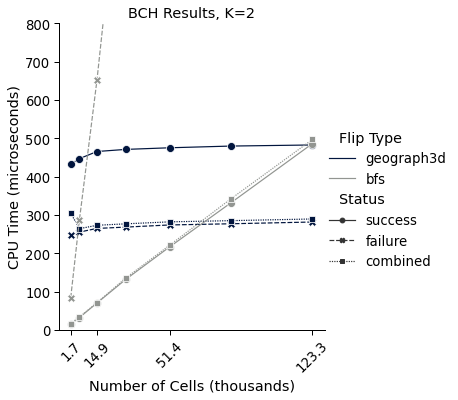

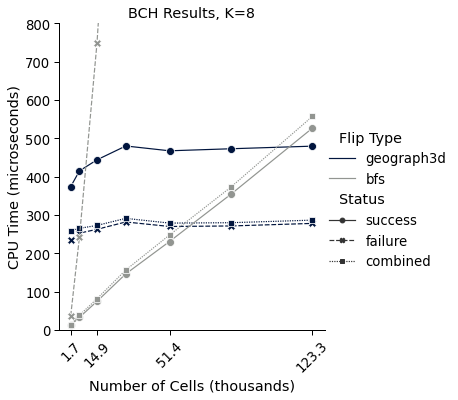

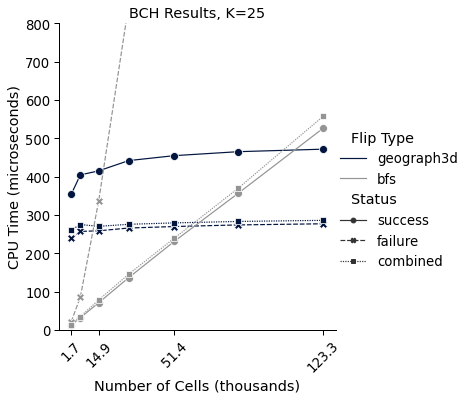

In [16]:
for k in [2, 8, 25]:
    plot_time_vs_cellcount(bch_df5, k, "bch")

## Plot All "Combined" Results Together

In [17]:
df5["Honeycomb Type"] = "ch"
bch_df5["Honeycomb Type"] = "bch"

df = pd.concat([df5, bch_df5]).reset_index()
df = df[df["Status"] == "combined"].drop(columns=["Status", "number of samples"])
df = df.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones", "Honeycomb Type"]).sum()
df.head(12)

CPU Time (microseconds)
Number of Cells (thousands) Flip Type  Number of Zones Honeycomb Type                         
1.0                         bfs        2               ch                             8.102992
                                       8               ch                             7.551101
                                       25              ch                             5.292396
                            geograph3d 2               ch                           182.581000
                                       8               ch                           168.056909
                                       25              ch                           146.716392
1.7                         bfs        2               bch                           16.867865
                                       8               bch                           13.243132
                                       25              bch                           13.788943
                            geograph3d 2               bch                          304.843778
                                       8               bch                          258.474224
                                       25              bch                          261.168733

In [18]:
def plot_combined_all_zone_counts(df, honeycomb_type):
    dfh = df.reset_index()
    dfh = dfh[dfh["Honeycomb Type"] == honeycomb_type]

    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Number of Zones", style_order=[2, 8, 25], kind="line", markers=True, markersize=MARKER_SIZE, data=dfh);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = np.unique(dfh["Number of Cells (thousands)"])
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[-1]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])

    plt.title("Combined Results: {}, All Zone Counts".format(honeycomb_type.upper()))
    plt.savefig("plot_combined_{}.pdf".format(honeycomb_type), bbox_inches="tight")
    plt.savefig("plot_combined_{}.png".format(honeycomb_type), bbox_inches="tight", dpi=600)

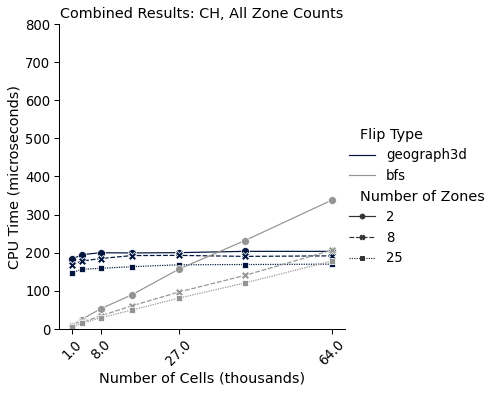

In [19]:
plot_combined_all_zone_counts(df, "ch")

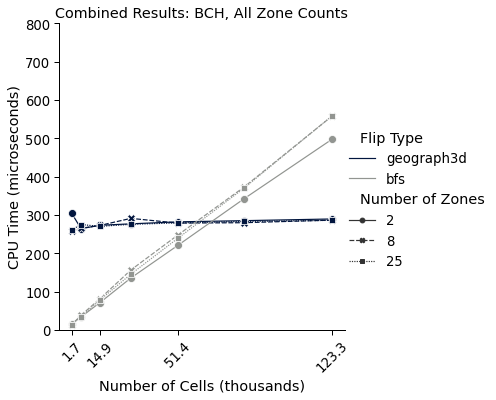

In [20]:
plot_combined_all_zone_counts(df, "bch")